In [0]:
import tensorflow
from keras.optimizers import SGD

In [0]:
from __future__ import print_function
import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import cv2
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = []
X_test = []
for i in range(len(x_train)):
  X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
  X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = numpy.asarray(X_train) 
X_test = numpy.asarray(X_test)

In [19]:
X_train.shape

(60000, 32, 32)

In [22]:

if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Convert to float and then normalize the images by dividing by 255(max value of a pixel)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
__________

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.3569 - acc: 0.8801 - val_loss: 0.0575 - val_acc: 0.9836
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0612 - acc: 0.9818 - val_loss: 0.0427 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0382 - acc: 0.9892 - val_loss: 0.0311 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0284 - acc: 0.9919 - val_loss: 0.0330 - val_acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0220 - acc: 0.9937 - val_loss: 0.0281 - val_acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0165 - acc: 0.9953 - val_loss: 0.0271 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0123 - acc: 0.9963 - val_loss: 0.0236 - 

In [30]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 4s 392us/step
[0.03222943743088908, 0.9911]


In [31]:
print("History", history.history)
print("history.history.keys():", history.history.keys())

History {'val_loss': [0.05752460888680071, 0.042716833085776305, 0.031086521799280308, 0.03301134239154344, 0.02807655531921191, 0.027149229627203748, 0.023572146921069362, 0.027258629364400985, 0.025609088702569716, 0.03222943743088908], 'val_acc': [0.9836, 0.9882, 0.9908, 0.9913, 0.9921, 0.9929, 0.9931, 0.9924, 0.9937, 0.9911], 'loss': [0.35689901853725314, 0.0612022745838544, 0.0381719230657133, 0.028397868129936978, 0.021956117314726, 0.016465884358258336, 0.012255517465585338, 0.010492771415949877, 0.009381190909165161, 0.006721448758822105], 'acc': [0.8800833333333333, 0.9818, 0.9891833333333333, 0.9919333333333333, 0.9936833333333334, 0.9952666666666666, 0.9963333333333333, 0.99715, 0.9973833333333333, 0.9983333333333333]}
history.history.keys(): dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


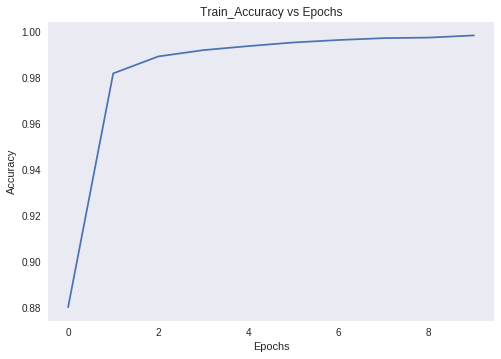

In [34]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Train_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

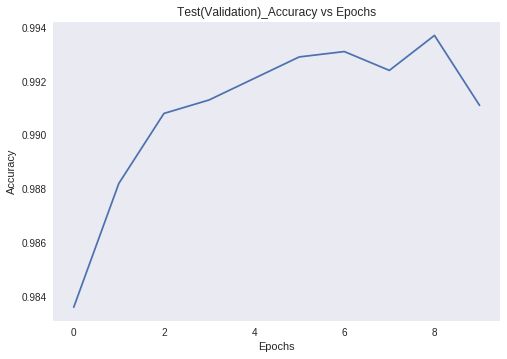

In [35]:
plt.plot(history.history['val_acc'])
plt.title('Test(Validation)_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

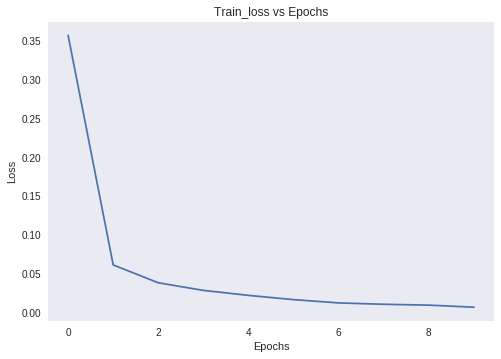

In [37]:
plt.plot(history.history['loss'])
plt.title('Train_loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

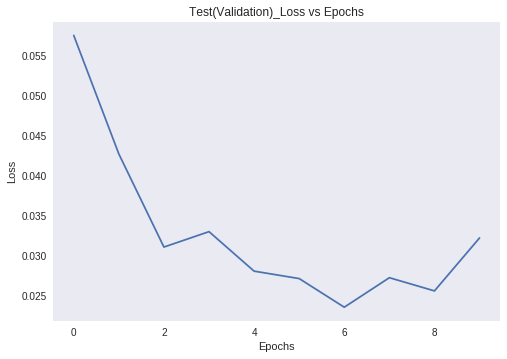

In [38]:
plt.plot(history.history['val_loss'])
plt.title('Test(Validation)_Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [49]:
s_loss = []
s_acc = []
for j in range(-45,50,5):
  rotate_test_x = []
  for i in range(len(X_test)):
    X_test_rotate = Image.fromarray(X_test[i])
    new_image = X_test_rotate.rotate(j)
    img_array = numpy.array(new_image)
    rotate_test_x.append(img_array)
  X_test_rotate = numpy.asarray(rotate_test_x)
  X_test_rotate = X_test_rotate.reshape(X_test_rotate.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_rotate, y_test, batch_size=32)
  print("Rotation degree: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])



10000/10000 [==============================] - 4s 391us/step
Rotation degree: -45 Score:[8.263532884597778, 0.4865]
10000/10000 [==============================] - 4s 376us/step
Rotation degree: -40 Score:[6.745380521774292, 0.5806]
10000/10000 [==============================] - 4s 379us/step
Rotation degree: -35 Score:[5.15834286441803, 0.6788]
10000/10000 [==============================] - 4s 377us/step
Rotation degree: -30 Score:[3.6693379108428954, 0.7718]
10000/10000 [==============================] - 4s 378us/step
Rotation degree: -25 Score:[2.2955894186973573, 0.8571]
10000/10000 [==============================] - 4s 378us/step
Rotation degree: -20 Score:[1.2492707360369744, 0.9217]
10000/10000 [==============================] - 4s 378us/step
Rotation degree: -15 Score:[0.6673230911970408, 0.9584]
10000/10000 [==============================] - 4s 378us/step
Rotation degree: -10 Score:[0.3747247033868657, 0.9766]
10000/10000 [==============================] - 4s 377us/step
Rotatio

In [50]:
s_loss

[8.263532884597778,
 6.745380521774292,
 5.15834286441803,
 3.6693379108428954,
 2.2955894186973573,
 1.2492707360369744,
 0.6673230911970408,
 0.3747247033868657,
 0.2075486031479929,
 0.12380297759616904,
 0.22805897455216745,
 0.2118638239026168,
 0.31229675275088165,
 0.5370197673923516,
 0.8850995954633283,
 1.5417911808073534,
 2.6017384689331053,
 3.923830470657349,
 5.32408429222107]

In [51]:
s_acc

[0.4865,
 0.5806,
 0.6788,
 0.7718,
 0.8571,
 0.9217,
 0.9584,
 0.9766,
 0.9869,
 0.9922,
 0.9858,
 0.9868,
 0.9804,
 0.9663,
 0.9448,
 0.9036,
 0.8376,
 0.755,
 0.6677]

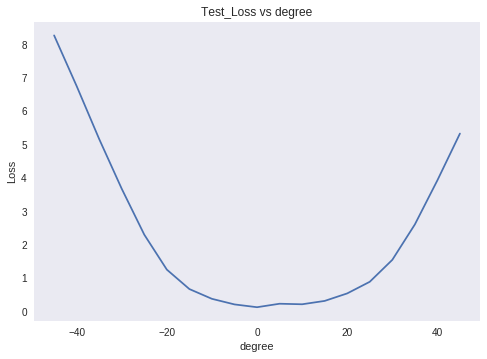

In [54]:
plt.plot( range(-45,50,5), s_loss)
plt.title('Test_Loss vs degree')
plt.ylabel('Loss')
plt.xlabel('degree')
plt.grid()
plt.show()

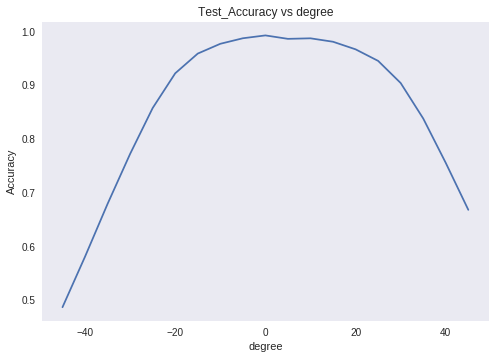

In [55]:
plt.plot( range(-45,50,5), s_acc)
plt.title('Test_Accuracy vs degree')
plt.ylabel('Accuracy')
plt.xlabel('degree')
plt.grid()
plt.show()

In [58]:
from PIL import ImageFilter
s_loss = []
s_acc = []
for j in range(0,7):
  filter_test_x = []
  for i in range(len(X_test)):
    X_test_filter = Image.fromarray(X_test[i])
    new_image = X_test_filter.filter(ImageFilter.GaussianBlur(radius=j))
    img_array = numpy.array(new_image)
    filter_test_x.append(img_array)
  X_test_filter = numpy.asarray(filter_test_x)
  X_test_filter = X_test_filter.reshape(X_test_filter.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_filter, y_test, batch_size=32)
  print("Filter radius: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 4s 388us/step
Filter radius: 0 Score:[0.12380297759616904, 0.9922]
10000/10000 [==============================] - 4s 378us/step
Filter radius: 1 Score:[0.1288113596051111, 0.9919]
10000/10000 [==============================] - 4s 378us/step
Filter radius: 2 Score:[0.47054962616960294, 0.9696]
10000/10000 [==============================] - 4s 380us/step
Filter radius: 3 Score:[2.5986409624814986, 0.8293]
10000/10000 [==============================] - 4s 378us/step
Filter radius: 4 Score:[5.613272819137573, 0.6116]
10000/10000 [==============================] - 4s 378us/step
Filter radius: 5 Score:[6.405314479827881, 0.4621]
10000/10000 [==============================] - 4s 377us/step
Filter radius: 6 Score:[7.127731807708741, 0.2879]


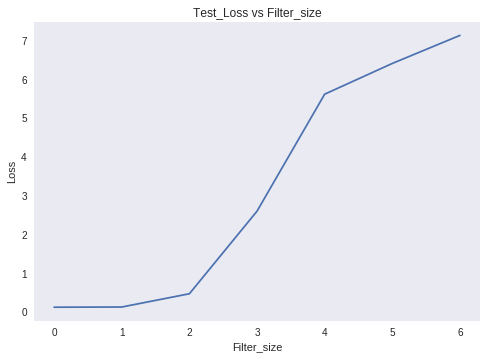

In [59]:
plt.plot( range(0,7), s_loss)
plt.title('Test_Loss vs Filter_radius')
plt.ylabel('Loss')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()

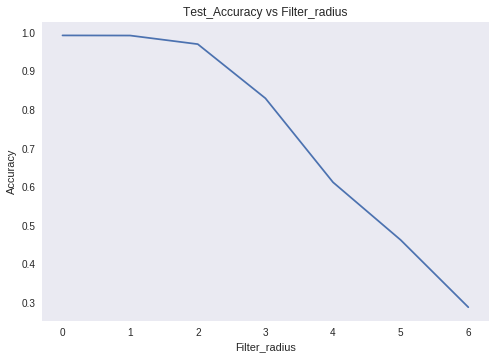

In [60]:
plt.plot( range(0,7), s_acc)
plt.title('Test_Accuracy vs Filter_radius')
plt.ylabel('Accuracy')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()